In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [27]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [29]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=100,activation='relu',return_sequences=True,input_shape=(lag,1)))
model.add(keras.layers.LSTM(units=100,activation='relu'))
model.add(keras.layers.Dense(units=1))
optimizer = keras.optimizers.Adam(5e-2)
model.compile(optimizer,loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=16,verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
Train on 247 samples, validate on 59 samples
Epoch 1/500
 - 1s - loss: 0.0277 - mse: 0.0277 - val_loss: 0.2513 - val_mse: 0.2513
Epoch 2/500
 - 0s - loss: 0.0252 - mse: 0.0252 - val_loss: 0.3493 - val_mse: 0.3493
Epoch 3/500
 - 0s - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 4/500
 - 0s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0744 - val_mse: 0.07

Epoch 79/500
 - 0s - loss: 1.1445e-04 - mse: 1.1445e-04 - val_loss: 4.2182e-04 - val_mse: 4.2182e-04
Epoch 80/500
 - 0s - loss: 8.5922e-05 - mse: 8.5922e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 81/500
 - 0s - loss: 2.2070e-04 - mse: 2.2070e-04 - val_loss: 3.0276e-04 - val_mse: 3.0276e-04
Epoch 82/500
 - 0s - loss: 1.1320e-04 - mse: 1.1320e-04 - val_loss: 3.9435e-04 - val_mse: 3.9435e-04
Epoch 83/500
 - 0s - loss: 1.3508e-04 - mse: 1.3508e-04 - val_loss: 7.0089e-04 - val_mse: 7.0089e-04
Epoch 84/500
 - 0s - loss: 7.0985e-05 - mse: 7.0985e-05 - val_loss: 6.2909e-04 - val_mse: 6.2909e-04
Epoch 85/500
 - 0s - loss: 2.0755e-04 - mse: 2.0755e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 86/500
 - 0s - loss: 1.1212e-04 - mse: 1.1212e-04 - val_loss: 2.7596e-04 - val_mse: 2.7596e-04
Epoch 87/500
 - 0s - loss: 8.3394e-05 - mse: 8.3394e-05 - val_loss: 7.4604e-04 - val_mse: 7.4604e-04
Epoch 88/500
 - 0s - loss: 9.6550e-05 - mse: 9.6550e-05 - val_loss: 3.0716e-04 - val_mse: 3.0716e-04
Epoch 

Epoch 163/500
 - 0s - loss: 6.7110e-05 - mse: 6.7110e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 164/500
 - 0s - loss: 4.9625e-05 - mse: 4.9625e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 165/500
 - 0s - loss: 6.4598e-05 - mse: 6.4598e-05 - val_loss: 5.8524e-04 - val_mse: 5.8524e-04
Epoch 166/500
 - 0s - loss: 7.7083e-05 - mse: 7.7083e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 167/500
 - 0s - loss: 1.1387e-04 - mse: 1.1387e-04 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 168/500
 - 0s - loss: 8.2252e-05 - mse: 8.2252e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 169/500
 - 0s - loss: 1.0111e-04 - mse: 1.0111e-04 - val_loss: 3.9211e-04 - val_mse: 3.9211e-04
Epoch 170/500
 - 0s - loss: 1.9131e-04 - mse: 1.9131e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 171/500
 - 0s - loss: 9.2611e-05 - mse: 9.2611e-05 - val_loss: 6.3176e-04 - val_mse: 6.3176e-04
Epoch 172/500
 - 0s - loss: 8.0961e-05 - mse: 8.0961e-05 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 173/500
 - 0s - loss: 1.4178e-

Epoch 249/500
 - 0s - loss: 1.0934e-04 - mse: 1.0934e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 250/500
 - 0s - loss: 6.1890e-05 - mse: 6.1890e-05 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 251/500
 - 0s - loss: 1.5135e-04 - mse: 1.5135e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 252/500
 - 0s - loss: 5.9396e-05 - mse: 5.9396e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 253/500
 - 0s - loss: 1.0729e-04 - mse: 1.0729e-04 - val_loss: 4.9740e-04 - val_mse: 4.9740e-04
Epoch 254/500
 - 0s - loss: 1.6385e-04 - mse: 1.6385e-04 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 255/500
 - 0s - loss: 1.0440e-04 - mse: 1.0440e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 256/500
 - 0s - loss: 6.3997e-05 - mse: 6.3997e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 257/500
 - 0s - loss: 1.1767e-04 - mse: 1.1767e-04 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 258/500
 - 0s - loss: 7.6052e-05 - mse: 7.6052e-05 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 259/500
 - 0s - loss: 6.5748e-05 - mse: 6.5748

Epoch 336/500
 - 0s - loss: 1.5386e-04 - mse: 1.5386e-04 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 337/500
 - 0s - loss: 8.2347e-05 - mse: 8.2347e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 338/500
 - 0s - loss: 5.1079e-05 - mse: 5.1079e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 339/500
 - 0s - loss: 5.8603e-05 - mse: 5.8603e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 340/500
 - 0s - loss: 4.0689e-05 - mse: 4.0689e-05 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 341/500
 - 0s - loss: 7.9169e-05 - mse: 7.9169e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 342/500
 - 0s - loss: 5.0627e-05 - mse: 5.0627e-05 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 343/500
 - 0s - loss: 4.8100e-05 - mse: 4.8100e-05 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 344/500
 - 0s - loss: 8.0601e-05 - mse: 8.0601e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 345/500
 - 0s - loss: 2.2077e-04 - mse: 2.2077e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 346/500
 - 0s - loss: 1.0741e-04 - mse: 1.0741e-04 - v

Epoch 423/500
 - 0s - loss: 9.9304e-05 - mse: 9.9304e-05 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 424/500
 - 0s - loss: 1.4781e-04 - mse: 1.4781e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 425/500
 - 0s - loss: 7.2818e-05 - mse: 7.2818e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 426/500
 - 0s - loss: 6.5511e-05 - mse: 6.5511e-05 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 427/500
 - 0s - loss: 7.7368e-05 - mse: 7.7368e-05 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 428/500
 - 0s - loss: 3.9149e-05 - mse: 3.9149e-05 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 429/500
 - 0s - loss: 4.5795e-05 - mse: 4.5795e-05 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 430/500
 - 0s - loss: 7.5988e-05 - mse: 7.5988e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 431/500
 - 0s - loss: 1.3463e-04 - mse: 1.3463e-04 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 432/500
 - 0s - loss: 1.1311e-04 - mse: 1.1311e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 433/500
 - 0s - loss: 6.1417e-05 - mse: 6.1417e-05 - v

In [30]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict))) #bs 1 295 bs 10 293 
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) #bs 1 342 bs 10 348

train mse squared: 121.37665886195649
test mse squared: 472.9015643372362


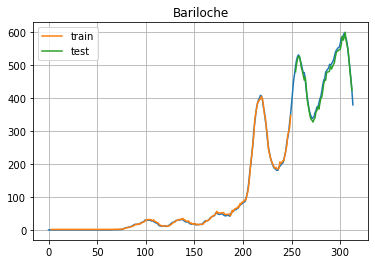

In [35]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Bariloche')
plt.legend()
plt.show()

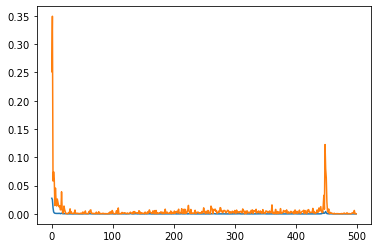

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])